In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
DATA_DIR = "../data"
data = input_data.read_data_sets( DATA_DIR, one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
NUM_STEPS = 1000
MINIBATCH_SIZE = 100

In [57]:
x = tf.placeholder( tf.float32, [None, 784] )
W = tf.Variable( tf.zeros([784, 10]) )

y_true = tf.placeholder( tf.float32, [None, 10])
y_pred = tf.matmul( x, W )

cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_pred, labels=y_true))
2
gd_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

correct_mask = tf.equal(tf.argmax( y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean( tf.cast( correct_mask, tf.float32 ))

In [41]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for _ in range(NUM_STEPS):
        batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
        
        sess.run(gd_step, feed_dict={x: batch_xs, y_true: batch_ys})
        
    final_weights = sess.run( W )
    ans = sess.run(accuracy, feed_dict={x:data.test.images, y_true: data.test.labels})
    
print(f"Accuracy: {ans*100}")

Accuracy: 91.43999814987183


In [53]:
import numpy as np

final_weights.shape
a = np.reshape(final_weights[:,9], (28, 28))

Populating the interactive namespace from numpy and matplotlib


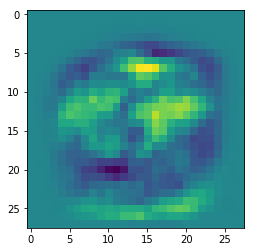

In [54]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(a)
plt.show()

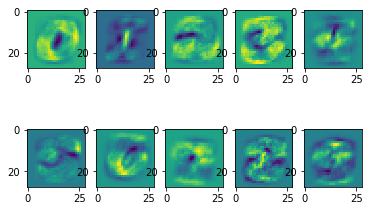

In [59]:
f, axarr = plt.subplots(2,5)
for i in range(0,10):
    a = np.reshape(final_weights[:,i], (28, 28))
    axarr[int(i/5),i%5].imshow(a)

### Let's try it again with an extra hidden layer

In [ ]:
x = tf.placeholder( tf.float32, [None, 784] )

hidden_size = 100

NUM_STEPS = 10000
MINIBATCH_SIZE = 256

W_hidden = tf.Variable( tf.zeros([784, hidden_size]) )
b_hidden = tf.Variable( tf.zeros([hidden_size]))

out1 = tf.nn.sigmoid( tf.matmul( x, W_hidden ) + b_hidden)

W_out = tf.Variable( tf.zeros([hidden_size, 10]) )

y_true = tf.placeholder( tf.float32, [None, 10])
y_pred = tf.matmul( out1, W_out )

cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits = y_pred, labels=y_true))
2
gd_step = tf.train.AdadeltaOptimizer(.99).minimize(cross_entropy)

correct_mask = tf.equal(tf.argmax( y_pred, 1), tf.argmax(y_true, 1))
accuracy = tf.reduce_mean( tf.cast( correct_mask, tf.float32 ))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    EPOCHS = 50
    for _ in range(EPOCHS):
        for _ in range(NUM_STEPS):
            batch_xs, batch_ys = data.train.next_batch(MINIBATCH_SIZE)
            sess.run(gd_step, feed_dict={x: batch_xs, y_true: batch_ys})
        ans = sess.run(accuracy, feed_dict={x: batch_xs, y_true: batch_ys})
        print(f"Accuracy: {ans*100}")
            
    final_weights = sess.run( W_out )
    final_weights_h = sess.run( W_hidden )
    final_b = sess.run(b_hidden)
    
    ans = sess.run(accuracy, feed_dict={x:data.test.images, y_true: data.test.labels})
    
print(f"Accuracy: {ans*100}")

import numpy as np

# final_weights.shape
# a = np.reshape(final_weights[:,9], (28, 28))
# 
# f, axarr = plt.subplots(2,5)
# for i in range(0,10):
#     a = np.reshape(final_weights[:,i], (28, 28))
#     axarr[int(i/5),i%5].imshow(a)

Accuracy: 30.859375
Accuracy: 44.921875
Accuracy: 41.796875
Accuracy: 48.828125
Accuracy: 48.046875
Accuracy: 44.921875
Accuracy: 52.34375
Accuracy: 54.296875
Accuracy: 55.078125
Accuracy: 57.03125
Accuracy: 55.46875
Accuracy: 51.953125
Accuracy: 57.421875
Accuracy: 57.8125
Accuracy: 53.515625
Accuracy: 53.90625
Accuracy: 57.8125
Accuracy: 53.125
Accuracy: 51.953125
Accuracy: 54.296875
Accuracy: 53.515625
Accuracy: 57.03125
Accuracy: 62.109375
